In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', 500)

In [2]:
dfTrain = pd.read_csv('train.csv', delimiter=',')
dfTest = pd.read_csv('test.csv', delimiter=',')

In [3]:
dfTest["SalePrice"]=np.nan

In [4]:
dfGlobal=pd.concat([dfTrain,dfTest])
iDs=dfGlobal["Id"]
dfGlobal=dfGlobal.drop(columns=["Id"])

In [5]:
def prepareVariablesExplicatives(df):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    colonnesNumeriques=list(set(df.select_dtypes(include=numerics).columns)-set(["SalePrice"]))
    display(df[colonnesNumeriques].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8))
    dfFiltre=df[colonnesNumeriques].fillna(0)
    dfFiltre=pd.concat([df[["SalePrice"]],dfFiltre], axis=1)
    colonnesAutres=set(df.columns)-set(list(colonnesNumeriques)+["SalePrice"])
    dfNum=dfFiltre
    for c in colonnesAutres:
        dfNum=pd.concat([dfNum,pd.get_dummies(df[c])],axis=1)
    return dfNum    

array([[<Axes: title={'center': 'WoodDeckSF'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'MoSold'}>,
        <Axes: title={'center': 'Fireplaces'}>],
       [<Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'TotRmsAbvGrd'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': '1stFlrSF'}>],
       [<Axes: title={'center': 'ScreenPorch'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'GarageYrBlt'}>,
        <Axes: title={'center': 'PoolArea'}>],
       [<Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'GarageArea'}>,
        <Axes: title={'center': 'MasVnrArea'

,SalePrice,WoodDeckSF,YearBuilt,2ndFlrSF,BsmtFullBath,MoSold,Fireplaces,LowQualFinSF,GrLivArea,TotRmsAbvGrd,...,Stone,C (all),FV,RH,RL,RM,Ex,Fa,Gd,TA
0,208500.0,0.0,2003.0,854.0,1.0,2.0,0.0,0.0,1710.0,8.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,181500.0,298.0,1976.0,0.0,0.0,5.0,1.0,0.0,1262.0,6.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,223500.0,0.0,2001.0,866.0,1.0,9.0,1.0,0.0,1786.0,6.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,140000.0,0.0,1915.0,756.0,1.0,2.0,1.0,0.0,1717.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,250000.0,192.0,2000.0,1053.0,1.0,12.0,1.0,0.0,2198.0,9.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,NaN,0.0,1970.0,546.0,0.0,6.0,0.0,0.0,1092.0,5.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1455,NaN,0.0,1970.0,546.0,0.0,4.0,0.0,0.0,1092.0,6.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1456,NaN,474.0,1960.0,0.0,1.0,9.0,1.0,0.0,1224.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1457,NaN,80.0,1992.0,0.0,0.0,7.0,0.0,0.0,970.0,6.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


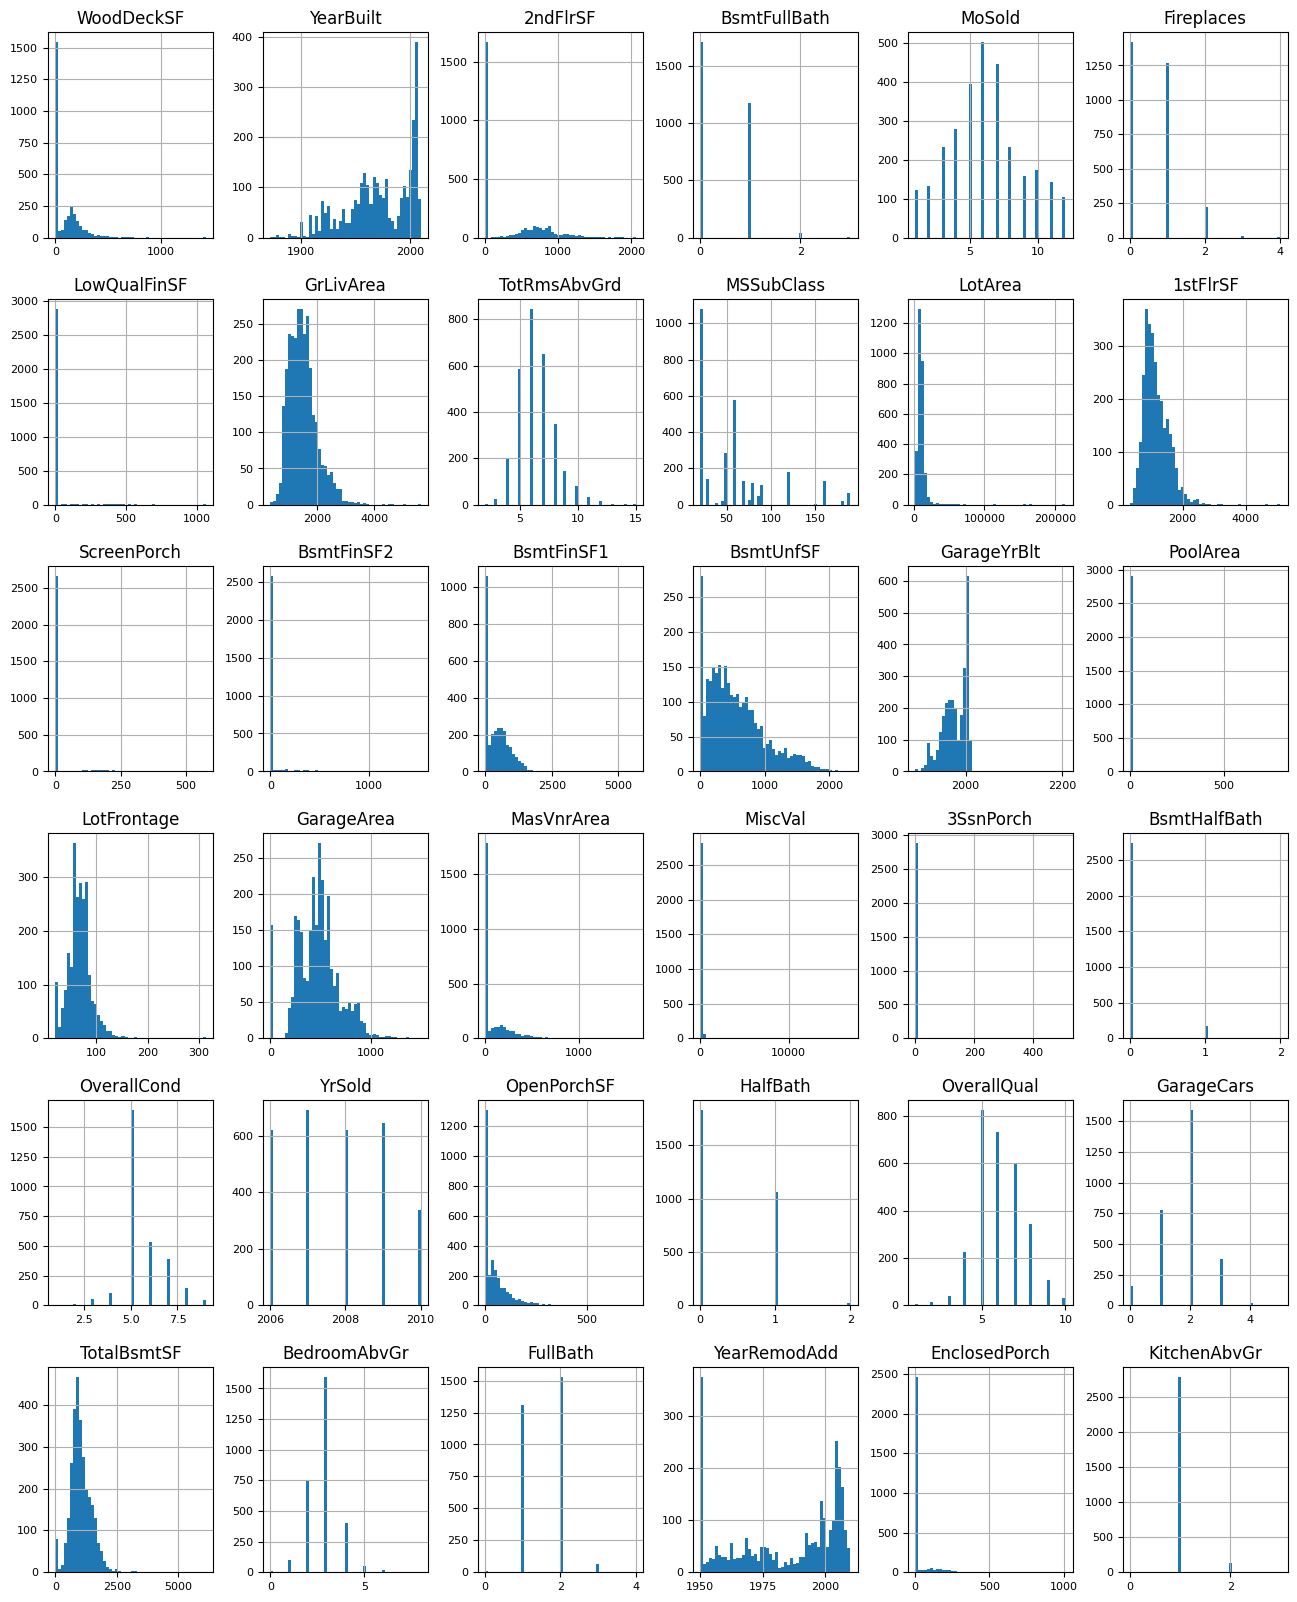

In [6]:
dfNumGlobal=prepareVariablesExplicatives(dfGlobal).astype(float)
dfNumGlobal

In [7]:
dfNumFit=dfNumGlobal.dropna(subset=["SalePrice"])
dfNumFit

,SalePrice,WoodDeckSF,YearBuilt,2ndFlrSF,BsmtFullBath,MoSold,Fireplaces,LowQualFinSF,GrLivArea,TotRmsAbvGrd,...,Stone,C (all),FV,RH,RL,RM,Ex,Fa,Gd,TA
0,208500.0,0.0,2003.0,854.0,1.0,2.0,0.0,0.0,1710.0,8.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,181500.0,298.0,1976.0,0.0,0.0,5.0,1.0,0.0,1262.0,6.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,223500.0,0.0,2001.0,866.0,1.0,9.0,1.0,0.0,1786.0,6.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,140000.0,0.0,1915.0,756.0,1.0,2.0,1.0,0.0,1717.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,250000.0,192.0,2000.0,1053.0,1.0,12.0,1.0,0.0,2198.0,9.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000.0,0.0,1999.0,694.0,0.0,8.0,1.0,0.0,1647.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1456,210000.0,349.0,1978.0,0.0,1.0,2.0,2.0,0.0,2073.0,7.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1457,266500.0,0.0,1941.0,1152.0,0.0,5.0,2.0,0.0,2340.0,9.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1458,142125.0,366.0,1950.0,0.0,1.0,4.0,0.0,0.0,1078.0,5.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [8]:
X = dfNumFit.values[:,1:]
y = dfNumFit.values[:,:1]

validation_split=0.8
split=int(X.shape[0]*(validation_split))


# Avec NN

In [9]:
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Dropout
from tensorflow.python.keras.callbacks import ModelCheckpoint

In [10]:
X = dfNumFit.values[:,1:]
X = ((X-X.min(axis=0)) / (X.max(axis=0)-X.min(axis=0)))*2.-1.0
y = dfNumFit.values[:,:1]

checkpoint = ModelCheckpoint('model.h5', 
    monitor='val_mae',
    save_best_only=True, 
    mode='auto'
)  

reg = Sequential()
reg.add(Dense(units=5000, activation='elu', input_dim=X.shape[1]))
reg.add(Dense(units=1000, activation='elu', input_dim=X.shape[1]))
reg.add(Dense(units=100, activation='elu', input_dim=X.shape[1]))
reg.add(Dense(units=5, activation='elu', input_dim=X.shape[1]))
#reg.add(Dropout(rate=0.1))
reg.add(Dense(units=1, activation=None))

reg.compile(loss='mse',
              optimizer='adam',
              metrics=['mae'])    
reg.summary()
print(tf.__version__)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5000)              1440000   
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              5001000   
_________________________________________________________________
dense_2 (Dense)              (None, 100)               100100    
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 505       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 6,541,611
Trainable params: 6,541,611
Non-trainable params: 0
_________________________________________________________________
2.12.0


In [11]:
reg.fit(X[:split,:],y[:split,:],validation_data=(X[-split:,:],y[-split:,:]), epochs=2000, batch_size=128,callbacks=[checkpoint])

Epoch 1/2000
10/10 [==============================] - 1s 85ms/step - loss: 38773092352.0000 - mae: 180462.8594 - val_loss: 38898774016.0000 - val_mae: 179997.2812
Epoch 2/2000
10/10 [==============================] - 1s 77ms/step - loss: 37993566208.0000 - mae: 178265.9375 - val_loss: 36792590336.0000 - val_mae: 174056.9375
Epoch 3/2000
10/10 [==============================] - 1s 80ms/step - loss: 34023137280.0000 - mae: 166634.8438 - val_loss: 29024344064.0000 - val_mae: 150135.0938
Epoch 4/2000
10/10 [==============================] - 1s 76ms/step - loss: 22619217920.0000 - mae: 127368.2344 - val_loss: 12826521600.0000 - val_mae: 82533.5312
Epoch 5/2000
10/10 [==============================] - 1s 82ms/step - loss: 8355425280.0000 - mae: 64997.9258 - val_loss: 7884888576.0000 - val_mae: 73642.8281
Epoch 6/2000
10/10 [==============================] - 1s 72ms/step - loss: 7183876096.0000 - mae: 70383.7344 - val_loss: 5965274112.0000 - val_mae: 55119.9102
Epoch 7/2000
10/10 [===========

In [18]:
reg.load_weights('model.h5')

In [19]:
mae = abs(y[:split,:]-reg.predict(X[:split,:])).mean()
print("The mean absolute error on training set: {:.4f}".format(mae))

mae = abs(y[-split:,:]-reg.predict(X[-split:,:])).mean()
print("The mean absolute error on validation set: {:.4f}".format(mae))

The mean absolute error on training set: 137.3151
The mean absolute error on validation set: 5462.4279


# Soumission

In [20]:
dfNumTest=dfNumGlobal
predictions=reg.predict(dfNumTest.values[:,1:])
predictions.squeeze()

array([5.8523430e+08, 6.4684557e+08, 6.6959795e+08, ..., 9.3035610e+08,
       5.2140362e+08, 6.7292538e+08], dtype=float32)

In [21]:
dfSoumission=pd.DataFrame({"Id":iDs, "SalePrice":list(predictions.squeeze())})
dfSoumission

,Id,SalePrice
0,1,585234304.0
1,2,646845568.0
2,3,669597952.0
3,4,599514880.0
4,5,842303680.0
...,...,...
1454,2915,229380256.0
1455,2916,265099072.0
1456,2917,930356096.0
1457,2918,521403616.0


In [22]:
dfSoumission=dfSoumission[dfSoumission["Id"].isin(dfTest.Id.values)]

In [23]:
dfSoumission.to_csv("my_submissionNN.csv", sep=',', index=False)